# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.direction'] = "in"

np.set_printoptions(precision=5, suppress=True)

random_states = [i*2+1 for i in range(5)]

def load_data_df(file_name):
    data = arff.loadarff(file_name)
    df = pd.DataFrame(data[0])
    
    for col in df.select_dtypes([object]):  
        df[col] = df[col].str.decode("utf-8")
        
    return df 

def load_data_meta_df(file_name):
    data, meta = arff.loadarff(file_name)
    df = pd.DataFrame(data)
    
    for col in df.select_dtypes([object]):  
        df[col] = df[col].str.decode("utf-8")
        
    return df, meta

def run_tests_clf(X, y, params, num_iter=5, normalize=False, verbose=True):
    data_df = pd.DataFrame(columns=["Attempt", "Train Score", "Test Score"])

    for i, random_state in enumerate(random_states):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
        
        if normalize:
            scaler = MinMaxScaler()
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
        
        clf = KNeighborsClassifier(**params)

        clf.fit(X_train, y_train)

        if verbose:
            print(f"Train score: {clf.score(X_train, y_train)}")
            print(f"Test score: {clf.score(X_test, y_test)}")
        
        data_df.loc[len(data_df)] = [int(i+1), clf.score(X_train, y_train), clf.score(X_test, y_test)]

    data_df["Attempt"] = data_df["Attempt"].astype(int)
    average_train = data_df["Train Score"].mean()
    average_test = data_df["Test Score"].mean()

    # Append the average row
    data_df.loc[len(data_df)] = ["Average", average_train, average_test]
    return data_df

def run_tests_reg(X, y, params, num_iter=5, normalize=False, features_to_skip=None):
    data_df = pd.DataFrame(columns=["Attempt", "Train Score", "Train MAE", "Test Score", "Test MAE"])

    for i, random_state in enumerate(random_states):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
        
        if normalize:
            scaler = MinMaxScaler()
            if features_to_skip is None:
                scaler.fit(X_train)
                X_train = scaler.transform(X_train)
                X_test = scaler.transform(X_test)
            else:
                X_train_features_to_normalize = X_train.drop(columns=features_to_skip)
                scaler.fit(X_train_features_to_normalize)
                X_train_scaled = scaler.transform(X_train_features_to_normalize)
                X_test_scaled = scaler.transform(X_test.drop(columns=features_to_skip))
                
                X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_features_to_normalize.columns)
                X_train_scaled_df["CHAS"] = X_train["CHAS"].reset_index(drop=True)
                
                X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_features_to_normalize.columns)
                X_test_scaled_df["CHAS"] = X_test["CHAS"].reset_index(drop=True)
                
                X_train = X_train_scaled_df
                X_test = X_test_scaled_df
        
        clf = KNeighborsRegressor(**params)

        clf.fit(X_train, y_train)

        print(f"Train score: {clf.score(X_train, y_train)}")
        print(f"Test score: {clf.score(X_test, y_test)}")
        
        data_df.loc[len(data_df)] = [int(i+1), clf.score(X_train, y_train), mean_absolute_error(clf.predict(X_train), y_train), clf.score(X_test, y_test), mean_absolute_error(clf.predict(X_test), y_test)]

    data_df["Attempt"] = data_df["Attempt"].astype(int)
    average_train = data_df["Train Score"].mean()
    average_test = data_df["Test Score"].mean()
    average_train_mae = data_df["Train MAE"].mean()
    average_test_mae = data_df["Test MAE"].mean()

    # Append the average row
    data_df.loc[len(data_df)] = ["Average", average_train, average_train_mae, average_test, average_test_mae]
    return data_df

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [ ]:
# Learn the glass data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X_df: pd.DataFrame = glass_identification.data.features
y_df: pd.DataFrame = glass_identification.data.targets

X = X_df.to_numpy()
y = y_df.to_numpy().ravel()
  
# # metadata 
# print(glass_identification.metadata) 
  
# # variable information 
# print(glass_identification.variables)
random_states = [1,3,5,7,9]

data_df = pd.DataFrame(columns=["Attempt", "Train Score", "Test Score"])

for i, random_state in enumerate(random_states):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
    
    clf = KNeighborsClassifier(p=2)

    clf.fit(X_train, y_train)

    print(f"Train score: {clf.score(X_train, y_train)}")
    print(f"Test score: {clf.score(X_test, y_test)}")
    
    data_df.loc[len(data_df)] = [int(i+1), clf.score(X_train, y_train), clf.score(X_test, y_test)]

data_df["Attempt"] = data_df["Attempt"].astype(int)
average_train = data_df["Train Score"].mean()
average_test = data_df["Test Score"].mean()

# Append the average row
data_df.loc[len(data_df)] = ["Average", average_train, average_test]
data_df

In [ ]:
print(data_df.to_markdown(index=False))

Default settings (p=2, Euclidean Distance)
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.748538 |     0.72093  |
| 2         |      0.766082 |     0.674419 |
| 3         |      0.754386 |     0.674419 |
| 4         |      0.783626 |     0.581395 |
| 5         |      0.754386 |     0.674419 |
| Average   |      0.761404 |     0.665116 |

```text
pred_proba for iteration 5 above
Train score: 0.7368421052631579
Test score: 0.7441860465116279

array([[1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0.2, 0.8, 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0.8, 0. , 0.2, 0. , 0. , 0. ],
       [0.4, 0. , 0.6, 0. , 0. , 0. ],
       [0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0.4, 0. , 0. , 0.6, 0. ],
       [0.4, 0.2, 0.4, 0. , 0. , 0. ],
       [0.2, 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0.2, 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0.4, 0.2, 0.4, 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0.6, 0.4, 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0.4, 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0. , 0. , 0.6, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.4, 0.4, 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0.2, 0.6, 0. , 0.2, 0. , 0. ],
       [0.8, 0. , 0.2, 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0.2, 0.2, 0. , 0. , 0. ]])```

p=1 (Manhattan Distance)
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.783626 |     0.767442 |
| 2         |      0.783626 |     0.674419 |
| 3         |      0.789474 |     0.674419 |
| 4         |      0.807018 |     0.627907 |
| 5         |      0.789474 |     0.72093  |
| Average   |      0.790643 |     0.693023 |

p=2 (Euclidean, default)
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.748538 |     0.72093  |
| 2         |      0.766082 |     0.674419 |
| 3         |      0.754386 |     0.674419 |
| 4         |      0.783626 |     0.581395 |
| 5         |      0.754386 |     0.674419 |
| Average   |      0.761404 |     0.665116 |

p=3
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.74269  |     0.697674 |
| 2         |      0.748538 |     0.627907 |
| 3         |      0.754386 |     0.674419 |
| 4         |      0.789474 |     0.651163 |
| 5         |      0.760234 |     0.627907 |
| Average   |      0.759064 |     0.655814 |

p=5
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.719298 |     0.674419 |
| 2         |      0.730994 |     0.627907 |
| 3         |      0.748538 |     0.651163 |
| 4         |      0.783626 |     0.627907 |
| 5         |      0.748538 |     0.674419 |
| Average   |      0.746199 |     0.651163 |

p=10
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.730994 |     0.674419 |
| 2         |      0.707602 |     0.604651 |
| 3         |      0.74269  |     0.651163 |
| 4         |      0.77193  |     0.651163 |
| 5         |      0.748538 |     0.697674 |
| Average   |      0.740351 |     0.655814 |

p=100
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.736842 |     0.697674 |
| 2         |      0.701754 |     0.581395 |
| 3         |      0.736842 |     0.651163 |
| 4         |      0.77193  |     0.651163 |
| 5         |      0.730994 |     0.674419 |
| Average   |      0.735673 |     0.651163 |

p=1000
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.649123 |     0.55814  |
| 2         |      0.619883 |     0.488372 |
| 3         |      0.602339 |     0.581395 |
| 4         |      0.643275 |     0.534884 |
| 5         |      0.637427 |     0.372093 |
| Average   |      0.630409 |     0.506977 |

#### Discussion
What were your accuracies or output probabilities and how did different hyperparameter values affect the outcome? Discuss the differences you see.

<span style="color: #66cc66">
Hi Lucy! I came into your office hours, and we tried to debug why my test accuracies were lower than yours. You had asked me to include a note in my discussion as a reminder that we didn't quite solve why my numbers were slightly different, but that if my code looks correct then you wouldn't dock points off. Thank you!
</span>

<span style="color: #66cc66">
The accuracies for the default parameters are shwon above, along with the output probailities for the final iteration of that test. Additionally, the results of varying the p value is shown above. The highest train and test scores were found when p=1, which is equivalent to using the manhattan distance as the distance metric. Also interesting is that the accuracy was not affected until p becamse greater than 100. The larger the p, the more affect outliers in the distance has. In theory, an infinite p only considers the largest distance from the point of interest to all other points. Therefore, it makes sense that, in general, the accuracy worsens for increasing p. There could still be an advantage of p=2 over p=1 depending on the importance of the outliers, but an extraneously large p value will in general result in poorer performance.
</span>

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [ ]:
# Learn magic telescope data
data_df = load_data_df("data/telescope.arff")

X = data_df.drop(["class:"], axis=1)
y = data_df["class:"]

data_df = run_tests_clf(X, y, params={"n_neighbors": 3, "weights": "uniform"})

data_df

In [ ]:
print(data_df.to_markdown(index=False))

| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.886107 |     0.797056 |
| 2         |      0.883938 |     0.804942 |
| 3         |      0.885515 |     0.788118 |
| 4         |      0.886632 |     0.803891 |
| 5         |      0.883544 |     0.797056 |
| Average   |      0.885147 |     0.798212 |

#### Discussion
What did you observe in your results?

<span style="color: #66cc66">
The test score is less than the average score by about 9%. The test score is still decent, however; it averages very high 70s.
</span>

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [ ]:
# Train/Predict with normalization
# Learn magic telescope data
data_df = load_data_df("data/telescope.arff")

X = data_df.drop(["class:"], axis=1)
y = data_df["class:"]

data_df = run_tests_clf(X, y, params={"n_neighbors": 3, "weights": "uniform"}, normalize=True)

data_df

In [ ]:
print(data_df.to_markdown(index=False))

| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.903063 |     0.821767 |
| 2         |      0.899711 |     0.825973 |
| 3         |      0.903983 |     0.825973 |
| 4         |      0.900565 |     0.838065 |
| 5         |      0.904114 |     0.832808 |
| Average   |      0.902287 |     0.828917 |

#### Discussion
Discuss the results of using normalized data vs. unnormalized data

<span style="color: #66cc66">
Both the train and test accuracies increased by about 2-3%! Additionally, the gap between the train and test score accuracies shrunk. Because KNNs are dependent on the distance from datapoint to datapoint, the features with larger possible ranges can overshadow the effect of other features! By normalizing the data in a range from -1 to 1, each feature has theoretically the same potential effect on the training model as ay other feature.
</span>

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [ ]:
#Train/Precdict with normalization and distance weighting
data_df = load_data_df("data/telescope.arff")

X = data_df.drop(["class:"], axis=1)
y = data_df["class:"]

data_df = run_tests_clf(X, y, params={"n_neighbors": 3, "weights": "distance"}, normalize=True)

data_df

In [ ]:
print(data_df.to_markdown(index=False))

| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |             1 |     0.822292 |
| 2         |             1 |     0.829127 |
| 3         |             1 |     0.828864 |
| 4         |             1 |     0.840168 |
| 5         |             1 |     0.833596 |
| Average   |             1 |     0.83081  |

#### Discussion
Comparison and discuss the differences you see with distance weighting and normalization vs without.

<span style="color: #66cc66">
With the combined effects of distance weighting and normalization, the training model got 100% accuracy on its training data! It also got slightly better accuracy on its test data that before. Distance weighting weights each datapoint inverselt with the distance to that datapoint, thereby giving the closer datapoints more effect on the predicted class. As can be seen, this generally leads to higher accuracy in both the train and tets sets if they are both representative of the data spread.
</span>

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each. 

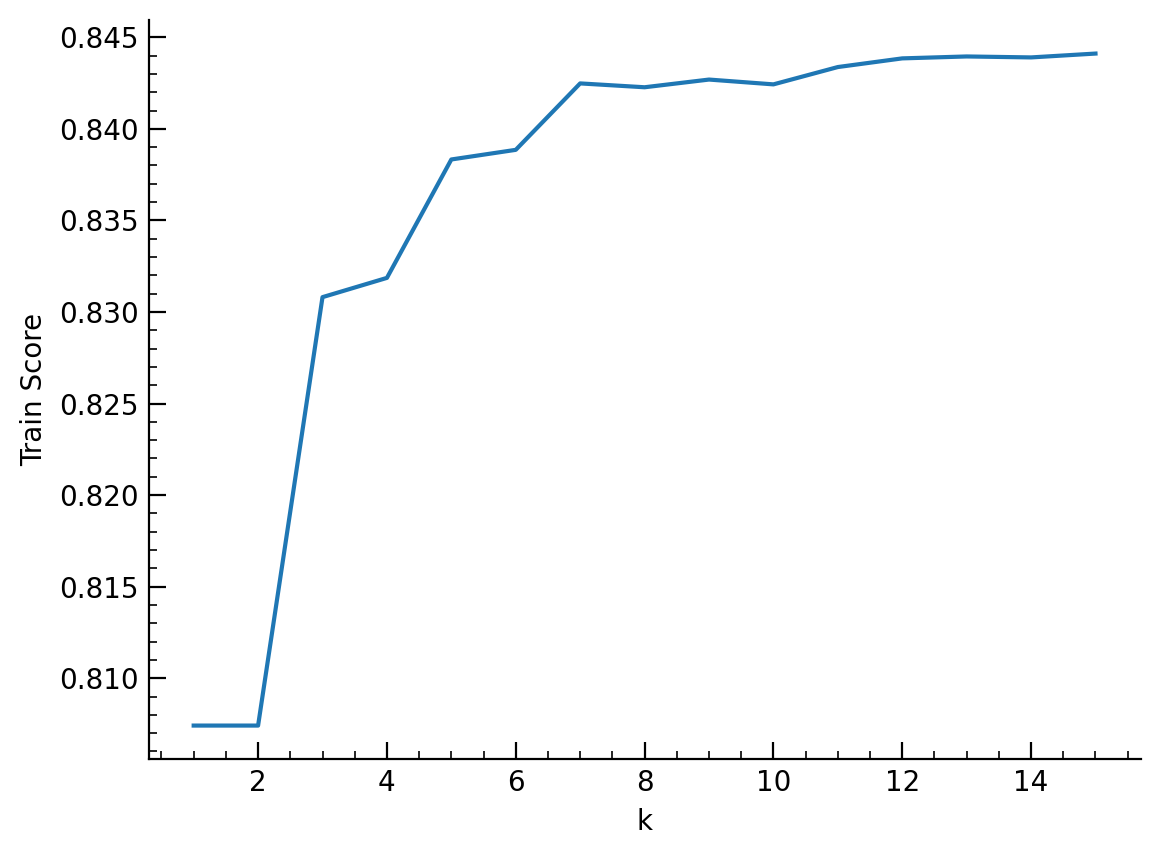

In [55]:
# Calculate and Graph classification accuracy vs k values
data_df = load_data_df("data/telescope.arff")

X = data_df.drop(["class:"], axis=1)
y = data_df["class:"]
ks = [i+1 for i in range(15)]
train_scores = []
for k in ks:
    train_score = 0
    params={"n_neighbors": k, "weights": "distance"}
    for i, random_state in enumerate(random_states):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
        
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        clf = KNeighborsClassifier(**params)

        clf.fit(X_train, y_train)
        
        train_score += clf.score(X_test, y_test)
    
    train_score /= len(random_states) 
    train_scores.append(train_score)
    # print(f"Average Test score: {train_score}")
        
plt.plot(ks, train_scores)
plt.xlabel("k")
plt.ylabel("Train Score")
plt.show()


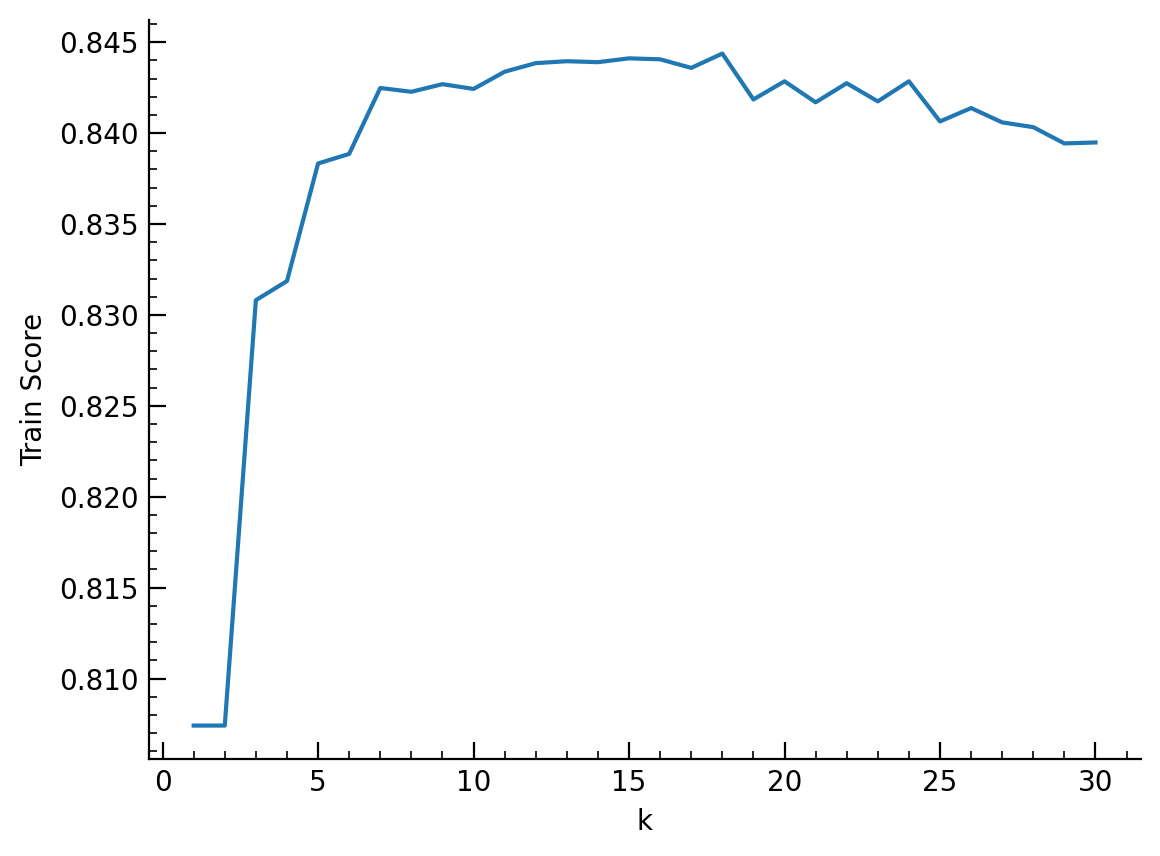

In [56]:
# Calculate and Graph classification accuracy vs k values
data_df = load_data_df("data/telescope.arff")

X = data_df.drop(["class:"], axis=1)
y = data_df["class:"]
ks = [i+1 for i in range(30)]
train_scores = []
for k in ks:
    train_score = 0
    params={"n_neighbors": k, "weights": "distance"}
    for i, random_state in enumerate(random_states):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
        
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        clf = KNeighborsClassifier(**params)

        clf.fit(X_train, y_train)
        
        train_score += clf.score(X_test, y_test)
    
    train_score /= len(random_states) 
    train_scores.append(train_score)
    # print(f"Average Test score: {train_score}")
        
plt.plot(ks, train_scores)
plt.xlabel("k")
plt.ylabel("Train Score")
plt.show()


#### Discussion
How do the k values affect your results?

<span style="color: #66cc66">
As can be seen in the graph above, the accuracy increases by a couple percent with an initial increase in k, but then it plateaus beyond a certain point. Repeated the same experiment but for k=1-30, the accuracy starts to decrease after increasing k too much. This shows that not a single k value will give the optimal result across all datasets, and analysis must be done to determine the best k value.
</span>

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

#### Discussion
Discuss the innapropriate feature. Which one and why?

<span style="color: #66cc66">
The inappropriate feature is B, which is based on the proportion of black people per town Bk. This is inappropriate because 1) it only has information on the percentage of black people per town and not other races, and 2) Bk is used in an equation to calculate B. This equation is not explained in the documentation. Without explanation, B looks like an arbitrary function of Bk rather than a statistically-based metric. Therefore, for both of the reasons above, B is unethical.
</span>

### 3.2 (15%) - KNN Regression 
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [ ]:
# Learn and experiment with housing price prediction data
#Train/Precdict with normalization and distance weighting
data_df = load_data_df("data/housing_price.arff")

X = data_df.drop(["MEDV", "B"], axis=1)
y = data_df["MEDV"]

# data_df = run_tests_reg(X, y, params={"n_neighbors": 3, "weights": "uniform"}, normalize=False, features_to_skip=["CHAS"])
# data_df = run_tests_reg(X, y, params={"n_neighbors": 3, "weights": "uniform"}, normalize=True, features_to_skip=["CHAS"])
# data_df = run_tests_reg(X, y, params={"n_neighbors": 3, "weights": "distance"}, normalize=True, features_to_skip=["CHAS"])
data_df = run_tests_reg(X, y, params={"n_neighbors": 3, "weights": "distance"}, normalize=False, features_to_skip=["CHAS"])
data_df

In [ ]:
print(data_df.to_markdown(index=False))

No normalization and no distance weighting
| Attempt   |   Train Score |   Train MAE |   Test Score |   Test MAE |
|:----------|--------------:|------------:|-------------:|-----------:|
| 1         |      0.809578 |     2.72467 |     0.591934 |    3.75327 |
| 2         |      0.803507 |     2.65561 |     0.625155 |    3.96765 |
| 3         |      0.819997 |     2.62814 |     0.589593 |    3.71373 |
| 4         |      0.827164 |     2.56914 |     0.520786 |    4.08039 |
| 5         |      0.812565 |     2.66262 |     0.511192 |    4.38464 |
| Average   |      0.814562 |     2.64804 |     0.567732 |    3.97993 |

Normalization and no distance weighting
| Attempt   |   Train Score |   Train MAE |   Test Score |   Test MAE |
|:----------|--------------:|------------:|-------------:|-----------:|
| 1         |      0.887009 |     2.0019  |     0.733034 |    3.08725 |
| 2         |      0.879818 |     2.1038  |     0.79626  |    2.66699 |
| 3         |      0.900935 |     1.95536 |     0.613314 |    3.30784 |
| 4         |      0.917292 |     1.82566 |     0.723108 |    2.93301 |
| 5         |      0.892568 |     1.98168 |     0.619251 |    3.30065 |
| Average   |      0.895524 |     1.97368 |     0.696993 |    3.05915 |

Normalization and distance weighting
| Attempt   |   Train Score |   Train MAE |   Test Score |   Test MAE |
|:----------|--------------:|------------:|-------------:|-----------:|
| 1         |             1 |           0 |     0.766132 |    2.94602 |
| 2         |             1 |           0 |     0.827586 |    2.48259 |
| 3         |             1 |           0 |     0.644776 |    3.16831 |
| 4         |             1 |           0 |     0.728345 |    2.92905 |
| 5         |             1 |           0 |     0.674885 |    3.03846 |
| Average   |             1 |           0 |     0.728345 |    2.91289 |

No normalization but WITH distance weighting
| Attempt   |   Train Score |   Train MAE |   Test Score |   Test MAE |
|:----------|--------------:|------------:|-------------:|-----------:|
| 1         |             1 |           0 |     0.618533 |    3.53187 |
| 2         |             1 |           0 |     0.624542 |    3.86425 |
| 3         |             1 |           0 |     0.60441  |    3.64123 |
| 4         |             1 |           0 |     0.506524 |    4.07705 |
| 5         |             1 |           0 |     0.548505 |    4.20438 |
| Average   |             1 |           0 |     0.580503 |    3.86376 |

#### Discussion
Discuss your results. How did the hyperparameters affect your results? Discuss each one and combinations of each.

<span style="color: #66cc66">
In general, the performance of the model on both the test and train datasets increased with normalization and distance weighting. This was seen in every possible combination of these two features. The biggest jump in accuracy was just by normalizing the data. HOWEVER, distance weighting WITHOUT normalization (as shown in the last set of results above) had a minimal effect on the test MAE. Therefore, I conclude that distance weighting is only truly effective when normalization has taken place. This makes intuitive sense as without normalization, the distance metric between features is incomporable and could oftentimes overshadow other important features. Therefore, the best combination is normalization with distance weighting. This makes sense considering that normalization is what allows distance weighting to be comparable across different features for a given datapoint.
</span>

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each. 

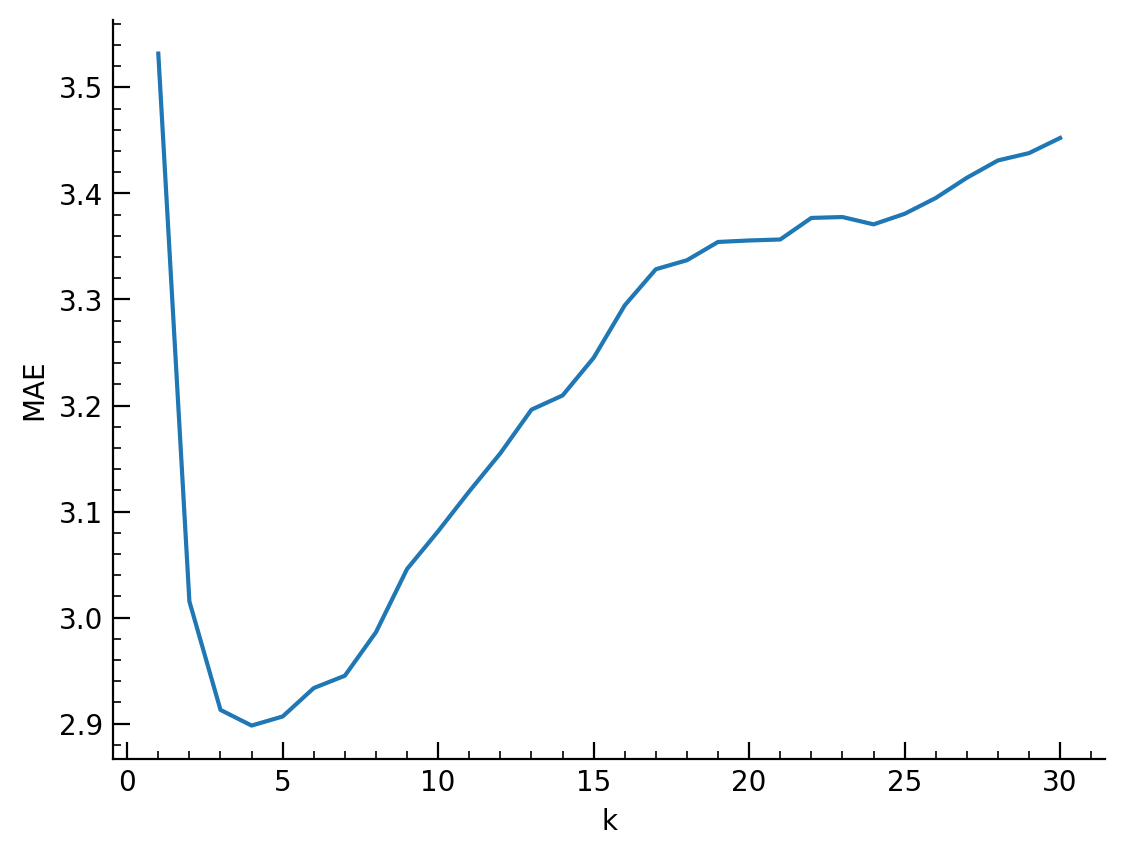

In [57]:
# Learn and graph for different k values
data_df = load_data_df("data/housing_price.arff")

X = data_df.drop(["MEDV", "B"], axis=1)
y = data_df["MEDV"]
ks = [i+1 for i in range(30)]
train_scores = []
normalize = True
features_to_skip=["CHAS"]

for k in ks:
    train_score = 0
    params={"n_neighbors": k, "weights": "distance"}
    for i, random_state in enumerate(random_states):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
        
        if normalize:
            scaler = MinMaxScaler()
            if features_to_skip is None:
                scaler.fit(X_train)
                X_train = scaler.transform(X_train)
                X_test = scaler.transform(X_test)
            else:
                X_train_features_to_normalize = X_train.drop(columns=features_to_skip)
                scaler.fit(X_train_features_to_normalize)
                X_train_scaled = scaler.transform(X_train_features_to_normalize)
                X_test_scaled = scaler.transform(X_test.drop(columns=features_to_skip))
                
                X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_features_to_normalize.columns)
                X_train_scaled_df["CHAS"] = X_train["CHAS"].reset_index(drop=True)
                
                X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_features_to_normalize.columns)
                X_test_scaled_df["CHAS"] = X_test["CHAS"].reset_index(drop=True)
                
                X_train = X_train_scaled_df
                X_test = X_test_scaled_df
        
        clf = KNeighborsRegressor(**params)

        clf.fit(X_train, y_train)

        # print(f"Train score: {clf.score(X_train, y_train)}")
        # print(f"Test score: {clf.score(X_test, y_test)}")
        
        train_score += mean_absolute_error(clf.predict(X_test), y_test)
        
    train_score /= len(random_states)
    # print(f"Average test MAE {train_score}")
    train_scores.append(train_score)
    
plt.plot(ks, train_scores)
plt.xlabel("k")
plt.ylabel("MAE")
plt.show()

#### Discussion
How did the k values affect your results for this dataset? How does that compare to your previous work in this lab?

<span style="color: #66cc66">
As before, an initial increase in k leads to a better performance. With the Classifier, this performance then plataued for a significant ranges of k before its accuracy started to decrease. For the Regressor, however, its performance immediately worsened once it reached its maximum; there was no plataeu period of performance. Therefore, as was conclude before, paying attention to your value of k is necessary to proper performance. BUT, it appears that for a regressor, even greater attention needs to be paid than for a classifier as the performance MAE is much more sensitive to changes in k.
</span>

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes 
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1 
- Use your own choice for k and other parameters

In [ ]:
# Train/Predict lymph with your own distance metric
from sklearn.preprocessing import LabelEncoder
data_df, meta = load_data_meta_df("data/lymph.arff")

meta.types()
meta.names()

def encode_nominal_data(data: np.ndarray):
    data = data.T
    le = LabelEncoder()
    transformed_data = data
    for row_num, (type, row) in enumerate(zip(meta.types(), data)):
        if type == "nominal":
             transformed_data[row_num, :] = le.fit_transform(row)
             
    return transformed_data.T

def make_callable_distance_func(types):
    def my_dist(point1: np.ndarray, point2: np.ndarray):
        euclid_dist = 0
        nom_dist = 0
        for index, (feature1, feature2, type) in enumerate(zip(point1, point2, types)):
            if type == "nominal":
                nom_dist += 1 if abs(feature1 - feature2) > 1e-6 else 0
            else:
                euclid_dist += (feature1 - feature2)**2
        
        return np.sqrt(euclid_dist) + nom_dist
    return my_dist

X = data_df.drop(labels=["class"], axis=1).to_numpy()
y = data_df["class"].to_numpy()

X = encode_nominal_data(X)

distance_func = make_callable_distance_func(meta.types())
params = {
    "metric": distance_func,
    "weights": "distance",
}

data_df = run_tests_clf(X, y, params=params, normalize=True)

data_df


In [ ]:
print(data_df.to_markdown(index=False))

Default settings
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.847458 |     0.766667 |
| 2         |      0.864407 |     0.8      |
| 3         |      0.864407 |     0.8      |
| 4         |      0.864407 |     0.833333 |
| 5         |      0.855932 |     0.8      |
| Average   |      0.859322 |     0.8      |

Normalization, Uniform weighting
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |      0.889831 |     0.833333 |
| 2         |      0.898305 |     0.9      |
| 3         |      0.90678  |     0.8      |
| 4         |      0.889831 |     0.833333 |
| 5         |      0.898305 |     0.766667 |
| Average   |      0.89661  |     0.826667 |

Normalization, Distance weighting
| Attempt   |   Train Score |   Test Score |
|:----------|--------------:|-------------:|
| 1         |             1 |     0.833333 |
| 2         |             1 |     0.9      |
| 3         |             1 |     0.8      |
| 4         |             1 |     0.866667 |
| 5         |             1 |     0.766667 |
| Average   |             1 |     0.833333 |

In [58]:
# Train/Predict lymph with your own distance metric
def plot_lymph_data(weighting):
    from sklearn.preprocessing import LabelEncoder
    data_df, meta = load_data_meta_df("data/lymph.arff")

    meta.types()
    meta.names()

    def encode_nominal_data(data: np.ndarray):
        data = data.T
        le = LabelEncoder()
        transformed_data = data
        for row_num, (type, row) in enumerate(zip(meta.types(), data)):
            if type == "nominal":
                transformed_data[row_num, :] = le.fit_transform(row)
                
        return transformed_data.T

    def make_callable_distance_func(types):
        def my_dist(point1: np.ndarray, point2: np.ndarray):
            euclid_dist = 0
            nom_dist = 0
            for index, (feature1, feature2, type) in enumerate(zip(point1, point2, types)):
                if type == "nominal":
                    nom_dist += 1 if abs(feature1 - feature2) > 1e-6 else 0
                else:
                    euclid_dist += (feature1 - feature2)**2
            
            return np.sqrt(euclid_dist) + nom_dist
        return my_dist

    X = data_df.drop(labels=["class"], axis=1).to_numpy()
    y = data_df["class"].to_numpy()

    X = encode_nominal_data(X)

    distance_func = make_callable_distance_func(meta.types())

    scores = []
    ks = [i for i in range(50)]
    for k in ks:

        params = {
            "metric": distance_func,
            "weights": weighting,
            "n_neighbors": k+1
        }

        data_df = run_tests_clf(X, y, params=params, normalize=True, verbose=False)

        scores.append(data_df["Test Score"].iloc[-1])

    plt.plot(ks, scores)
    plt.title(f"Weights: {weighting}")
    plt.xlabel("k")
    plt.ylabel("Test Accuracy")
    plt.show()

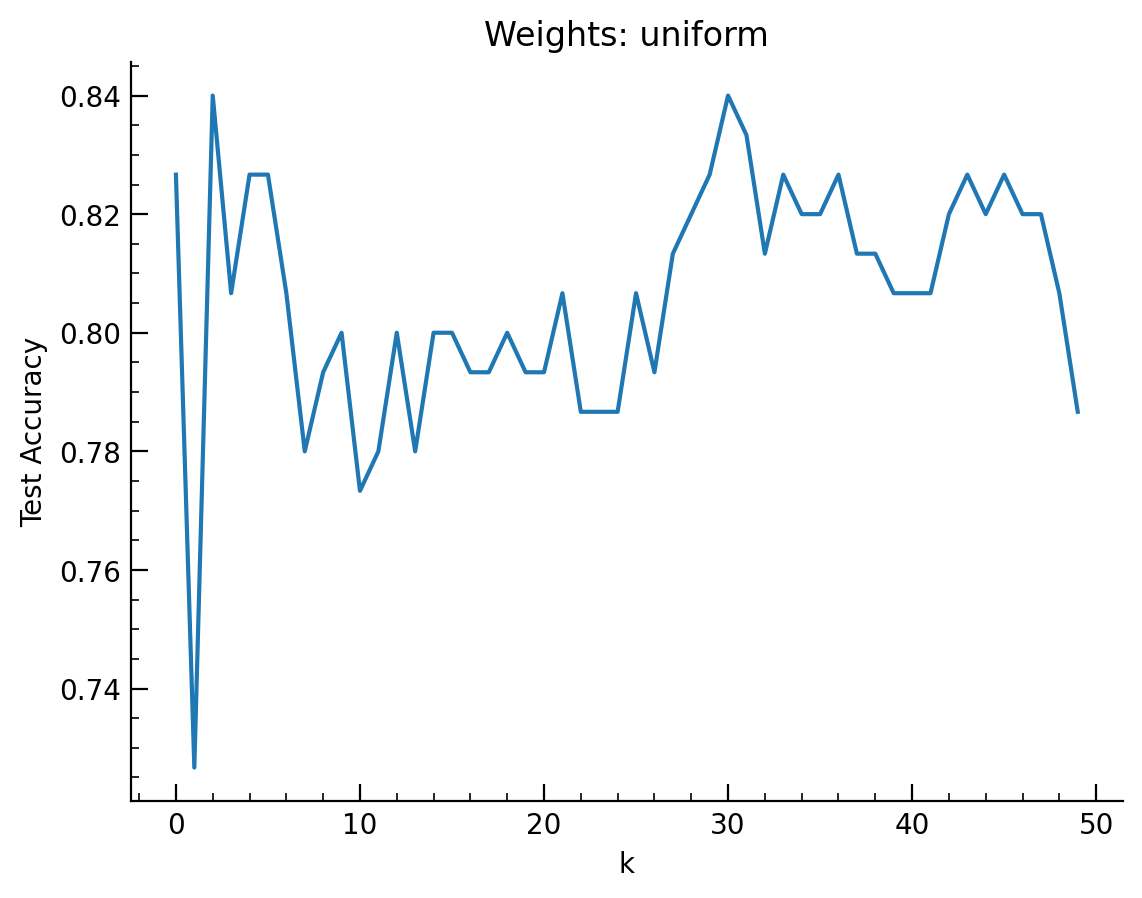

In [59]:
plot_lymph_data("uniform")

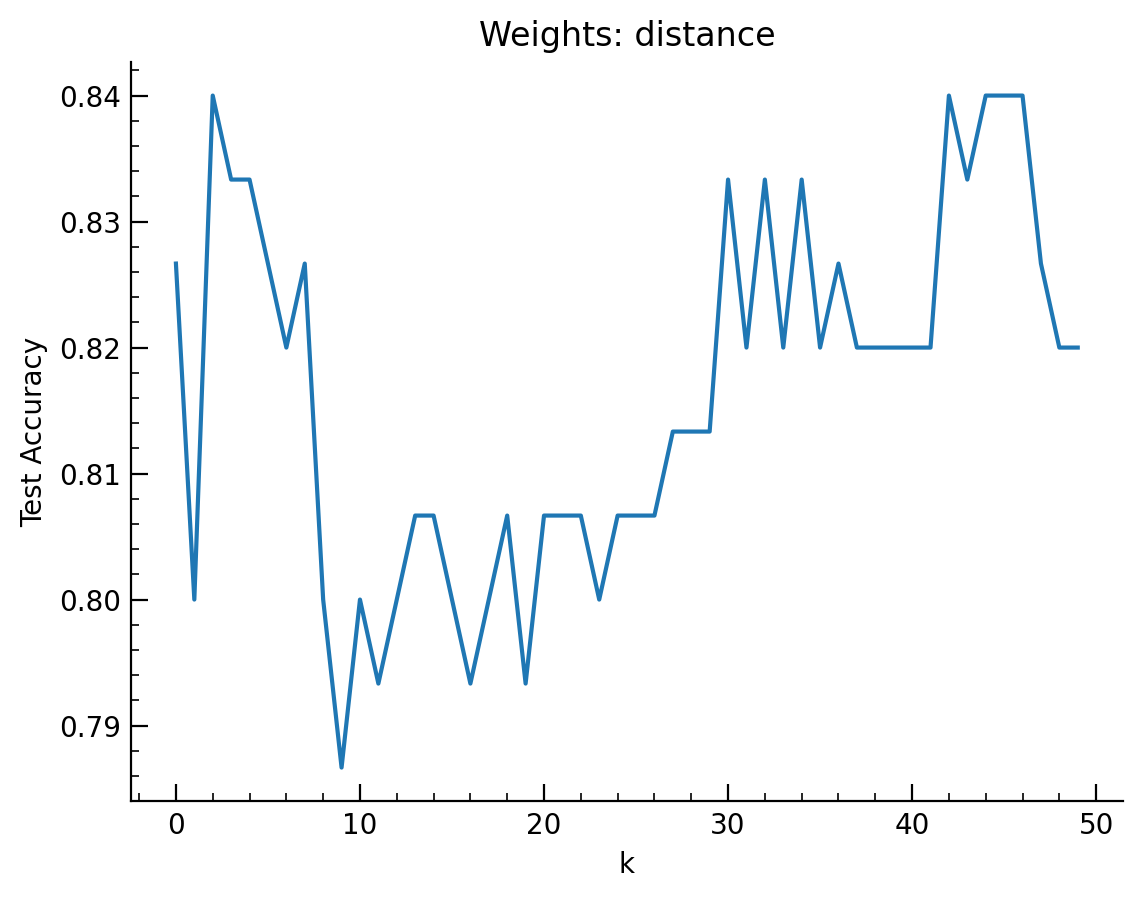

In [60]:
plot_lymph_data("distance")

#### Discussion
Explain your distance metric and discuss your results

<span style="color: #66cc66">
My distance function is pretty self-explanatory. Due to how the callable function is created, my distance function remembers the list of datatypes from meta.types(), which looks like a list of "numeric" and "nominal" strings. During operation, the function accepts two datapoints as 1-d numpy arrays and initializes a variable euclid_dist=0 and nom_dist=0. The function then iterates through each feature pair between the two points. In each iteration, if the datatype is "nominal" according to the list, then it adds 1 to nom_dist if they are different and 0 if they are the same. Note that instead of using a `==` sign, I check if the absolute value difference between the two features is less than a certain tolerance. This is in the hopes of removing any round-off error that occured when the nominal integer values were normalized. If the datatype is "numeric" according to the list, then it adds the square of the difference between the two features to euclid_dist. Finally, it takes the square root of euclid_dist in order to put the distance into the correct "units" and then adds nom_dist. This final distance is then returned. 
</span>

<span style="color: #66cc66">
As can be seen above, the first set of results in this section shows the affect of normalization and normalization+distance weighting on the result. Normalization improved both the average test and average train score. Then doing distance weighting on the normalized data also improved the accuracy, compared to uniform weighting on the normalized data. I also tested both weighting styles as I varied k, as shown in the two plots above. Both plots reached the same maximum accuracy of .853, but in different k values. The uniform weighting also had the worst accuracy by a few percents. Thus, it is interesting to see that the optimal k value differs between weighting methods, as well as the behavior of the accuracy as k is varied. A general trend between the two can be seen that the accuracy starts high, then dips with mid-20s k values, and then increases momentarily before decreasing again. But besides this trend, they look like two fairly distinct curves. All in all, the distance function seems to have done its job correctly! It's awesome that both numerical and nominal data types can be combiend to estimate "distance"!
</span>

## 5. (Optional 15% extra credit) Code up your own KNN Learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results 

*Discussion*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0